In [19]:
#Loading the Required Python Libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df=pd.read_csv('Add_sales_data_2018.csv')
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [2]:
df.describe()


,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [4]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [5]:
df.nunique()

Date                    205
Add1(in Thousands)      173
Add2(in Thousands)      190
Add3(in Thousands)      187
Add4(in Thousands)      192
Add5(in Thousands)      194
Profit(in Thousands)    205
dtype: int64

# 1) Checking whether there is any relationship between the amount spent for advertising through five different companies and profit generated :-

<AxesSubplot:>

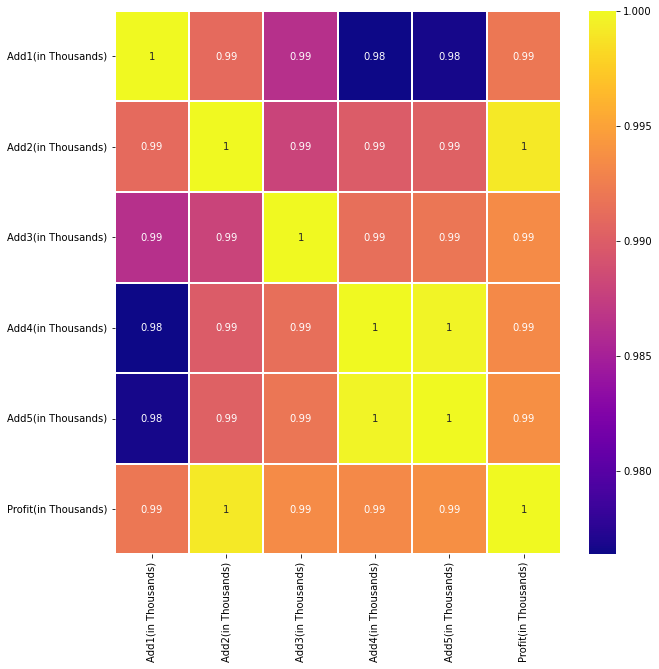

In [6]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,linewidth=.2,cmap="plasma")

From the plot we can say that

1)Add 2 has the strongest correlation with the Profit generated.

   i.e If the value of Add2 Increases, the profit generated also increases 
   if the Add 2 value decreases, the profit decreases.

2)The Adds 1,3,4,5 also have a strong correlation of 0.99 with the profit generated.
3)Add 4 & Add 5 have a correlation of 1.

we can conclude that , all the above features in the given Dataset can be used to build a Regression Model to predict Profit since they have High Correlation with the Target.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.


In [7]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [8]:
x=df.drop(['Date','Profit(in Thousands)'],axis=1)
y = df['Profit(in Thousands)']

In [9]:
x.shape

(205, 5)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size = 0.25 )

In [11]:
lr=linear_model.LinearRegression()


In [12]:
model=lr.fit(x_train,y_train)


In [13]:
predictions=model.predict(x_test)


In [14]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [15]:
predictions

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [17]:
print("mse is",mean_squared_error(predictions,y_test))

mse is 1.1930489604130207e-24


The mean squared error obtained here is the lowest value and hence we can conclude that the linear regression model built is perfectly fit to predict the profit

# 3.  Predict the profit generated by the company, if they wish to spend the following amount for advertisement. 

# following amount for advertisement. 
 
Add1(in Thousands) 290 

Add2(in Thousands) 312 

Add3(in Thousands) 309 

Add4(in Thousands) 298

Add5(in Thousands) 320 

In [18]:
predicted_profit=lr.predict([[290,312,309,298,320]]).item()
predicted_profit

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5820.06

An estimated Profit(in Thousands) of 5820.06 will be generated.